**Members of Group 6:**

Clàudia Blasco, Laura Buide, Carla Cruz, Laia Espluga and Lucia Rodríguez.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image, ImageSequence
from IPython.display import HTML
import cv2
from skimage import io

# Conway's Game of Life and GIFs Introduction  

## What is Conway's Game of Life?  

The Game of Life is a zero-player game, meaning that its evolution is determined entirely by its initial state, with no further input from the player. The user only selects or defines the initial configuration.  

It was developed by John Conway in 1970 and is a type of cellular automaton, meaning it consists of a grid where each cell evolves based on specific rules.  

At first, it may seem simple, but it is surprisingly easy to create complex and unpredictable behaviors.  

## How do you play?  

Let's start with the rules:  

1. Any dead cell with exactly three live neighbors becomes a live cell.  
2. Any live cell with two or three live neighbors survives to the next generation.  
3. Any live cell with fewer than two or more than three live neighbors dies due to underpopulation or overpopulation.  

## How does it work?  

The game takes place on an infinite 2D grid, but for practical simulations, we typically use a finite board.  

The game progresses in discrete steps called *generations*, where all cells update simultaneously based on the rules. There is no randomness—just rules and initial conditions.  

## What about the grid?  

The grid is modeled as a toroid, meaning it wraps around both horizontally and vertically. This looping structure ensures continuity and efficient resource management.  

But why use a loop? The main reason is to optimize computational resources. Simulating an infinite space presents two significant challenges:  

1. The grid expands quadratically, leading to an exponential increase in memory consumption and processing power requirements, which quickly becomes unsustainable.  
2. Visualizing an infinite space becomes increasingly complex, making it harder to interpret and interact with effectively.  


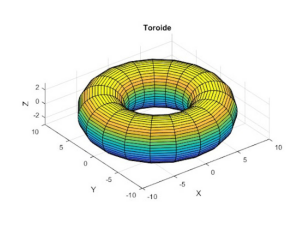

In [2]:
f = "https://lh6.googleusercontent.com/proxy/pWl9uLoaQ0N46FTIaoqEqqQs9Cpmb0z9ADLDBXAde8mwPKIDcokuRi4lX7LFPSgVLTWA6j45EIi_9vrcNL4vM42RsSZXIRwLGnIrONpmdiNC7Lszsw"
a = io.imread(f)

plt.imshow(a)
plt.axis('off')

plt.show()

## Innitial Enviroment

**Creating a grid:**

In [3]:
def create_custom_grid(rows, cols, live_cells=None):
    """Creates a grid with dead cells (0) and allows defining live cells (1)."""
    grid = np.zeros((rows, cols), dtype=int)  # Initializes everything as 0 (dead)
    if live_cells:
        for (i, j) in live_cells:
            if 0 <= i < rows and 0 <= j < cols:
                grid[i, j] = 1  # Marks the cell as alive
    return grid

**Updating the grid following rules and treat the space like a torus:**

In [4]:
def update_grid(grid, rules):
    """Updates the grid according to the given rules (Game of Life or variants) with toroidal behavior."""
    new_grid = grid.copy()
    size = grid.shape[0]

    for i in range(size):
        for j in range(size):
            # Calculate neighbors considering toroidal limits
            alive_neighbors = 0
            for di in range(-1, 2):
                for dj in range(-1, 2):
                    # Toroidal coordinates (wrapping around edges)
                    ni = (i + di) % size
                    nj = (j + dj) % size

                    # Do not count the central cell itself
                    if (di != 0 or dj != 0):
                        alive_neighbors += grid[ni, nj]

            # Update the cell state according to the rules
            if grid[i, j] == 1:  # Live cell
                new_grid[i, j] = 1 if alive_neighbors in rules["survive"] else 0
            else:  # Dead cell
                new_grid[i, j] = 1 if alive_neighbors in rules["born"] else 0

    return new_grid

## Setting rules

**Standard rules:** 

-One live cell survives if it has 2 or 3 live neighbours.

-One dead cell turns to an alive cell if it has 3 alive neighbours.

-A live cell dies if it has less than 2 or more than 3 live neighbours.(By infrapopulation and overpopulation)

In [5]:
classic_rules = {"survive": [2, 3], "born": [3]}

## Generate Animation

Following two functions allows us to do all the animations that you will see next

In [6]:
def generate_animation(grid, rules, steps=50, interval=200):
    """Generates a GIF and displays the animation live in the notebook."""
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xticks([])
    ax.set_yticks([])
    
    img_display = ax.imshow(grid, cmap="binary", interpolation="nearest")
    ax.set_title("Step: 0")
    plt.pause(0.5)
    images = []  
    step_counter = [0]  

    def update(frame):  # Function that applies updates to create an animation
        """Updates the animation at each step"""
        ax.set_title(f"Step: {step_counter[0]}")  

        # Copy the grid to avoid accidental modifications
        nonlocal grid  
        grid = update_grid(grid.copy(), rules)  
        img_display.set_array(grid)

        # Save the frame for the GIF
        img = Image.fromarray((grid * 255).astype(np.uint8))  
        images.append(img)

        step_counter[0] += 1  

        return [img_display]

    # Create the animation
    anim = animation.FuncAnimation(fig, update, frames=steps, interval=interval, blit=False)

    return HTML(anim.to_jshtml())  # Display in the notebook

## Basic Example 

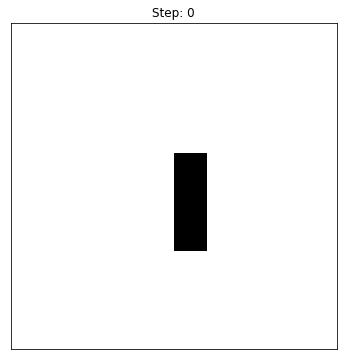

In [7]:
grid = create_custom_grid(10, 10, live_cells=[(5, 5), (6, 5), (4, 5)])
generate_animation(grid, classic_rules,steps=10,interval=350)

## Static

As his name says is a pattern that has the balance to stay stable. They usually used to "draw".

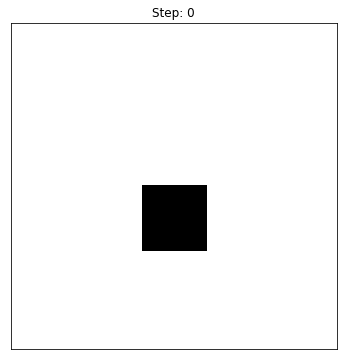

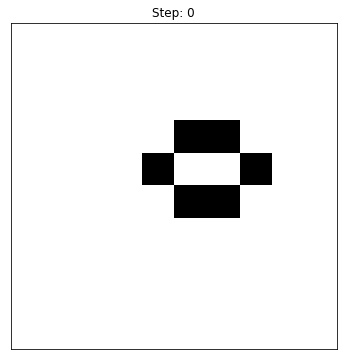

In [8]:
grid = create_custom_grid(10, 10, live_cells=[(5, 5), (6, 5), (6, 4),(5,4)])
generate_animation(grid, classic_rules,steps=2,interval=350)

grid = create_custom_grid(10, 10, live_cells=[(5, 5), (5, 6), (4, 4),(4,7),(3,5),(3,6)])
generate_animation(grid, classic_rules,steps=10,interval=350)

## Infinite

A pattern that his sequence of states its a loop. (n large)

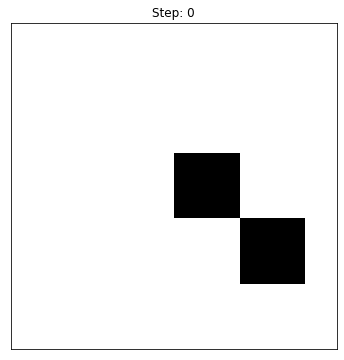

In [9]:
grid = create_custom_grid(10, 10, live_cells=[(5, 5), (5, 6), (4, 5), (4, 6), (6, 7),(6,8),(7,7),(7,8)])
generate_animation(grid, classic_rules,steps=10,interval=300)

## Starship

Interesting pattern that can travel trough the space. (Into all sides) 

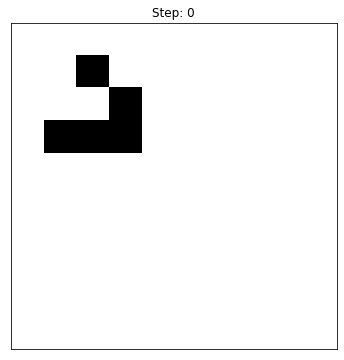

In [10]:
grid = create_custom_grid(10, 10, live_cells=[(1, 2), (2, 3), (3, 1), (3, 2), (3, 3)])
generate_animation(grid, classic_rules,steps=27,interval=200)

## Matusalean

A pattern that initially seems to be caotic but in infinite steps it tends to a stable displacement.

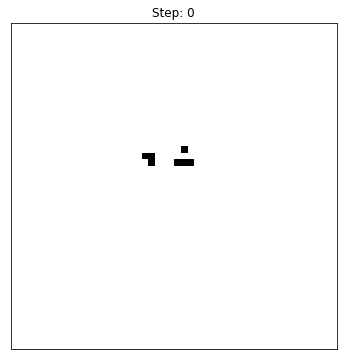

In [11]:
grid = create_custom_grid(50, 50, live_cells=[(20, 20),(20,21),(21,21),(21,25),(21,26),(21,27),(19,26)])
generate_animation(grid, classic_rules,steps=132,interval=75)

# Variants
****
## Highlife

If we add the property to born with 6 neighbours cells, we enable to do self-replicating patterns.





### Replicators

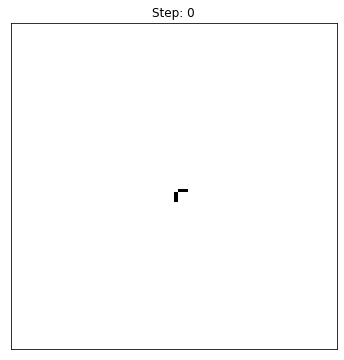

In [12]:
highlife_rules = {"survive": [2, 3], "born": [3, 6]}

#Replicator
grid = create_custom_grid(100, 100, live_cells=[(51, 51), (51, 52), (51, 53),(52,50),(53,50),(54,50)])
generate_animation(grid, highlife_rules,steps=500,interval=100)

## Day_Night

A symmetric rule where patterns survive and grow in both light and dark areas, making it unique for its reversible behavior.

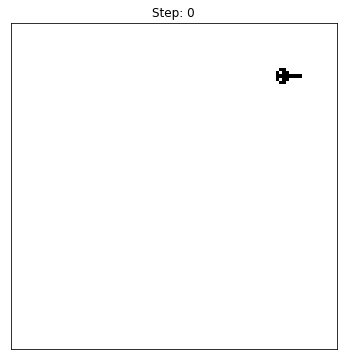

In [13]:
day_night_rules = {"survive": [3, 4, 6, 7, 8], "born": [3, 6, 7, 8]}

alive_cells = [
    (14, 82),(14, 83),
    (15, 81),(15, 83),(15, 84),
    (16, 81),(16, 82),(16, 83),(16, 84),(16, 85),(16, 86),(16, 87),(16, 88),
    (17, 81),(17, 83),(17, 84),
    (18, 82),(18, 83)
]

#Starship
grido = create_custom_grid(100, 100, live_cells=alive_cells)
generate_animation(grido, day_night_rules,steps=200,interval=150)

### Complementary Starship

In [ ]:
all_cells = {(x, y) for x in range(100) for y in range(100)}
complementary_cells = all_cells - set(alive_cells)

grid = create_custom_grid(100, 100, live_cells=complementary_cells)
generate_animation(grid, day_night_rules,steps=200,interval=150)
#*aviable for all types of the original rules.

## Seeds

With this variant cells never survive, leading to fast and chaotic growth like an explosion.

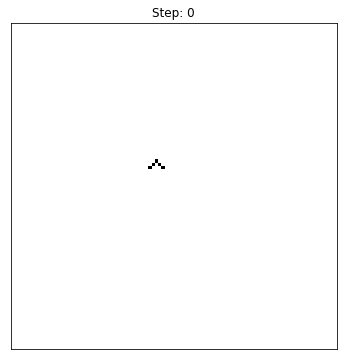

In [15]:
seeds_rules = {"survive": [], "born": [2]}

grid = create_custom_grid(100, 100, live_cells=[(42, 44), (43, 43), (43, 45),(44,42),(44,46)])
generate_animation(grid, seeds_rules,steps=100,interval=150)

## Curiosity

**What happens if we do a static grid ?**

In [16]:
def update_grid(grid, rules):
    new_grid = grid.copy()
    size = grid.shape[0]

    for i in range(size):
        for j in range(size):
            alive_neighbors = np.sum(grid[max(0, i-1):min(size, i+2), max(0, j-1):min(size, j+2)]) - grid[i, j]

            if grid[i, j] == 1:  # Alive cell
                new_grid[i, j] = 1 if alive_neighbors in rules["survive"] else 0
            else:  # Dead cell
                new_grid[i, j] = 1 if alive_neighbors in rules["born"] else 0

    return new_grid

**Trying with normal Starship**

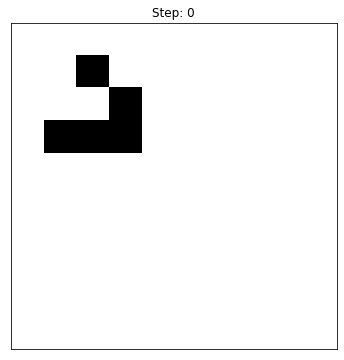

In [17]:
grid = create_custom_grid(10, 10, live_cells=[(1, 2), (2, 3), (3, 1), (3, 2), (3, 3)])
generate_animation(grid, classic_rules,steps=30,interval=200)

**Trying whith Day_Night complementary Starship**

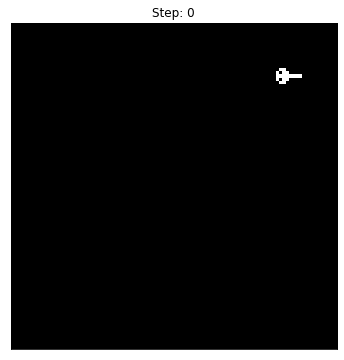

In [18]:
day_night_rules = {"survive": [3, 4, 6, 7, 8], "born": [3, 6, 7, 8]}

alive_cells = [
    (14, 82),(14, 83),
    (15, 81),(15, 83),(15, 84),
    (16, 81),(16, 82),(16, 83),(16, 84),(16, 85),(16, 86),(16, 87),(16, 88),
    (17, 81),(17, 83),(17, 84),
    (18, 82),(18, 83)
]
all_cells = {(x, y) for x in range(100) for y in range(100)}
complementary_cells = all_cells - set(alive_cells)

grid = create_custom_grid(100, 100, live_cells=complementary_cells)
generate_animation(grid, day_night_rules,steps=200,interval=150)

## Function to generate a Gif from one certain grid and certain rules

In [19]:
def generate_gif(grid, rules, steps=50, filename="output.gif", title=""):
    """Generates an animated GIF showing the evolution of a pattern."""
    images = []

    for step in range(steps):
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.imshow(grid, cmap='binary')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"{title} - Step {step}")

        # Save the image temporarily
        plt.savefig("temp.png", bbox_inches='tight', pad_inches=0)
        plt.close(fig)

        images.append(Image.open("temp.png"))
        grid = update_grid(grid, rules)  # Update state

    # Create the GIF
    images[0].save(filename, save_all=True, append_images=images[1:], duration=100, loop=0)
    print(f"✅ GIF saved as {filename}")

generate_gif(grid.copy(), classic_rules, filename="game_of_life.gif", title="Game of Life")

✅ GIF saved as game_of_life.gif


## Interactive program to play and test

In [ ]:
!pip install pygame

In [8]:
#Interactive program to play and test 
import pygame # If you don't have it install it with (pip install pygame)
import time
pygame.init()

width,height=900,900

screen=pygame.display.set_mode((height,width))

bg=25,25,25

screen.fill(bg)

nxC,nyC=25,25

dimCW=width/nxC

dimCH=height/nyC


gameState=np.zeros((nxC,nyC))

# If you want you can start with a Starship
"""gameState[21,21]=1
gameState[22,22]=1
gameState[22,23]=1
gameState[21,23]=1
gameState[20,23]=1"""



pauseExect=False
running = True
 
while running:
    
    newGameState= gameState.copy()
    
    screen.fill(bg)
    time.sleep(0.1)
    
    ev=pygame.event.get()
    
    for event in ev:
        if event.type==pygame.KEYDOWN:
            pauseExect=not pauseExect
    
        mouseClick=pygame.mouse.get_pressed()
        if sum(mouseClick)>0:
            posX,posY=pygame.mouse.get_pos()
            
            celX,celY=int(np.floor(posX/dimCW)),int(np.floor(posY/dimCH))
            newGameState[celX,celY]=not mouseClick[2]
        
        if event.type == pygame.QUIT:
            running = False
    
    for y in range(0,nxC):
        for x in range (0,nyC):
            
            if not pauseExect:
            
            
                n_neigh=gameState[(x-1) % nxC,(y-1)% nyC]+gameState[(x)% nxC,(y-1)% nyC]+gameState[(x+1)% nxC,(y-1)% nyC]+gameState[(x-1)% nxC,(y)% nyC]+gameState[(x+1)% nxC,(y)% nyC]+gameState[(x-1)% nxC,(y+1)% nyC]+gameState[(x)% nxC,(y+1)% nyC]+gameState[(x+1)% nxC,(y+1)% nyC]

                if gameState[x,y]==0 and (n_neigh==3):
                     newGameState[x,y]=1

                if gameState[x,y]==1 and (n_neigh<2 or n_neigh>3):
                     newGameState[x,y]=0




            poly=[((x)*dimCW,y*dimCH),
                     ((x+1)*dimCW,y*dimCH),
                     ((x+1)*dimCW,(y+1)*dimCH),
                     ((x)*dimCW,(y+1)*dimCH)]

            if  newGameState[x,y]==0:
                    pygame.draw.polygon(screen,(128,128,128),poly,1)

            if  newGameState[x,y]==1:
                    pygame.draw.polygon(screen,(255,255,255),poly,0)

    gameState=newGameState.copy()
                
    pygame.display.flip()

pygame.quit()

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default


**To finish, a video of the potencial of Game of Life.**

## 🚀 Challenge 1: Color Evolution
**Your task is to modify the previous code to allow for color customization of live cells in the game.**

Instructions:

1. When placing live cells, allow the user to select the color of each cell in RGB values. They should be able to choose from Red, Green, or Blue by right-clicking on a cell.
2. When a new cell is born, its color should be set to the most frequent color among its neighboring live cells.

In [11]:
import pygame
import numpy as np

# Constants
WIDTH, HEIGHT = 800, 800
ROWS, COLS = 50, 50
CELL_SIZE = WIDTH // COLS
COLORS = {1: (255, 0, 0), 2: (0, 255, 0), 3: (0, 0, 255)}
GRID = np.zeros((ROWS, COLS), dtype=int)

def get_neighbors(row, col):
    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    neighbors = []
    for dr, dc in directions:
        nr, nc = row + dr, col + dc
        if 0 <= nr < ROWS and 0 <= nc < COLS and GRID[nr, nc] > 0:
            neighbors.append(GRID[nr, nc])
    return neighbors

def most_frequent_color(neighbors):
    if not neighbors:
        return 0
    unique, counts = np.unique(neighbors, return_counts=True)
    return unique[np.argmax(counts)]

def update_grid():
    global GRID
    new_grid = np.zeros((ROWS, COLS), dtype=int)
    for row in range(ROWS):
        for col in range(COLS):
            neighbors = get_neighbors(row, col)
            live_neighbors = len(neighbors)
            if GRID[row, col] > 0 and live_neighbors in [2, 3]:
                new_grid[row, col] = GRID[row, col]
            elif GRID[row, col] == 0 and live_neighbors == 3:
                new_grid[row, col] = most_frequent_color(neighbors)
    GRID = new_grid

def draw_grid(win):
    win.fill((0, 0, 0))
    for row in range(ROWS):
        for col in range(COLS):
            color = COLORS.get(GRID[row, col], (50, 50, 50))
            pygame.draw.rect(win, color, (col * CELL_SIZE, row * CELL_SIZE, CELL_SIZE - 1, CELL_SIZE - 1))
    pygame.display.update()

def main():
    pygame.init()
    win = pygame.display.set_mode((WIDTH, HEIGHT))
    clock = pygame.time.Clock()
    running, playing = True, False
    
    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            elif event.type == pygame.KEYDOWN:
                if event.key == pygame.K_SPACE:
                    playing = not playing
            elif pygame.mouse.get_pressed()[2]:  # Right-click to change color
                x, y = pygame.mouse.get_pos()
                col, row = x // CELL_SIZE, y // CELL_SIZE
                if 0 <= row < ROWS and 0 <= col < COLS:
                    GRID[row, col] = np.random.choice([1, 2, 3])
        if playing:
            update_grid()
        draw_grid(win)
        clock.tick(10)
    
    pygame.quit()

if __name__ == "__main__":
    main()


ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default


## 🚀 Challenge 2: Hexagonal Grid Creation
**Your task is to modify the code to create a hexagonal grid with the appropriate implications.**

Instructions:
1. Modify the grid structure to arrange cells in a hexagonal pattern rather than a rectangular one. This will affect how neighbors are defined and how cells interact.
2. Adjust the logic for determining the neighbors of each cell to account for the hexagonal layout. Each cell should have six neighbors (instead of the usual four in a square grid).


In [7]:
import pygame
import numpy as np
import math

# Constants
WIDTH, HEIGHT = 800, 800
ROWS, COLS = 20, 20  # Adjusted for hexagonal layout
HEX_SIZE = WIDTH // (COLS * 1.5)  # Hexagon size
GRID = np.zeros((ROWS, COLS), dtype=int)

def hex_to_pixel(q, r):
    """Converts hexagonal coordinates to pixel coordinates."""
    x = HEX_SIZE * (3/2 * q)
    y = HEX_SIZE * (math.sqrt(3) * (r + 0.5 * (q % 2)))
    return int(x + WIDTH / 4), int(y + HEIGHT / 6)

def get_hex_neighbors(q, r):
    """Returns neighbors in a hexagonal grid."""
    directions = [(+1, 0), (-1, 0), (+1, -1), (-1, +1), (0, +1), (0, -1)]
    neighbors = []
    for dq, dr in directions:
        nq, nr = q + dq, r + dr
        if 0 <= nq < ROWS and 0 <= nr < COLS:
            neighbors.append(GRID[nq, nr])
    return neighbors

def update_grid():
    """Updates the grid using hexagonal Game of Life rules."""
    global GRID
    new_grid = np.zeros((ROWS, COLS), dtype=int)
    for q in range(ROWS):
        for r in range(COLS):
            neighbors = get_hex_neighbors(q, r)
            live_neighbors = sum(neighbors)
            if GRID[q, r] == 1 and live_neighbors in [2, 3]:
                new_grid[q, r] = 1
            elif GRID[q, r] == 0 and live_neighbors == 3:
                new_grid[q, r] = 1
    GRID = new_grid

def draw_grid(win):
    win.fill((0, 0, 0))
    for q in range(ROWS):
        for r in range(COLS):
            x, y = hex_to_pixel(q, r)
            color = (255, 255, 255) if GRID[q, r] == 1 else (50, 50, 50)
            pygame.draw.polygon(win, color, [(x + HEX_SIZE * math.cos(math.radians(angle)),
                                              y + HEX_SIZE * math.sin(math.radians(angle)))
                                             for angle in range(0, 360, 60)], 0)
    pygame.display.update()

def main():
    pygame.init()
    win = pygame.display.set_mode((WIDTH, HEIGHT))
    clock = pygame.time.Clock()
    running, playing = True, False
    
    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            elif event.type == pygame.KEYDOWN:
                if event.key == pygame.K_SPACE:
                    playing = not playing
            elif pygame.mouse.get_pressed()[0]:
                x, y = pygame.mouse.get_pos()
                for q in range(ROWS):
                    for r in range(COLS):
                        hx, hy = hex_to_pixel(q, r)
                        if (x - hx) ** 2 + (y - hy) ** 2 < (HEX_SIZE / 2) ** 2:
                            GRID[q, r] = 1
        if playing:
            update_grid()
        draw_grid(win)
        clock.tick(10)
    
    pygame.quit()

if __name__ == "__main__":
    main()

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default


## 🚀 Challenge 3: Color Evolution on a Hexagonal Grid
**Your task is to modify the code to implement both a color evolution feature and a hexagonal grid. This challenge combines the concepts from the previous challenges into a single task.**

Instructions:
1. Modify the grid structure to arrange cells in a hexagonal pattern instead of a rectangular one. Remember that each cell should have six neighbors.
2. When selecting the initial position of live cells, allow the user to choose the color of each cell using RGB values. The user should be able to right-click on a cell to set its color to Red, Green, or Blue.
3. When a new cell is born, its color should be set to the most frequent color among its neighboring live cells.

In [10]:
import pygame
import numpy as np
import math

# Constants
WIDTH, HEIGHT = 800, 800
ROWS, COLS = 20, 20  # Hex grid size
HEX_SIZE = WIDTH // (COLS * 1.5)
COLORS = {1: (255, 0, 0), 2: (0, 255, 0), 3: (0, 0, 255)}
GRID = np.zeros((ROWS, COLS), dtype=int)

def hex_to_pixel(q, r):
    x = HEX_SIZE * (3/2 * q)
    y = HEX_SIZE * (math.sqrt(3) * (r + 0.5 * (q % 2)))
    return int(x + WIDTH / 4), int(y + HEIGHT / 6)

def get_hex_neighbors(q, r):
    directions = [(+1, 0), (-1, 0), (+1, -1), (-1, +1), (0, +1), (0, -1)]
    neighbors = []
    for dq, dr in directions:
        nq, nr = q + dq, r + dr
        if 0 <= nq < ROWS and 0 <= nr < COLS and GRID[nq, nr] > 0:
            neighbors.append(GRID[nq, nr])
    return neighbors

def most_frequent_color(neighbors):
    if not neighbors:
        return 0
    unique, counts = np.unique(neighbors, return_counts=True)
    return unique[np.argmax(counts)]

def update_grid():
    global GRID
    new_grid = np.zeros((ROWS, COLS), dtype=int)
    for q in range(ROWS):
        for r in range(COLS):
            neighbors = get_hex_neighbors(q, r)
            live_neighbors = len(neighbors)
            if GRID[q, r] > 0 and live_neighbors in [2, 3]:
                new_grid[q, r] = GRID[q, r]
            elif GRID[q, r] == 0 and live_neighbors == 3:
                new_grid[q, r] = most_frequent_color(neighbors)
    GRID = new_grid

def draw_grid(win):
    win.fill((0, 0, 0))
    for q in range(ROWS):
        for r in range(COLS):
            x, y = hex_to_pixel(q, r)
            color = COLORS.get(GRID[q, r], (50, 50, 50))
            pygame.draw.polygon(win, color, [(x + HEX_SIZE * math.cos(math.radians(angle)),
                                              y + HEX_SIZE * math.sin(math.radians(angle)))
                                             for angle in range(0, 360, 60)], 0)
    pygame.display.update()

def main():
    pygame.init()
    win = pygame.display.set_mode((WIDTH, HEIGHT))
    clock = pygame.time.Clock()
    running, playing = True, False
    
    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            elif event.type == pygame.KEYDOWN:
                if event.key == pygame.K_SPACE:
                    playing = not playing
            elif pygame.mouse.get_pressed()[2]:  # Right-click to change color
                x, y = pygame.mouse.get_pos()
                for q in range(ROWS):
                    for r in range(COLS):
                        hx, hy = hex_to_pixel(q, r)
                        if (x - hx) ** 2 + (y - hy) ** 2 < (HEX_SIZE / 2) ** 2:
                            GRID[q, r] = np.random.choice([1, 2, 3])
        if playing:
            update_grid()
        draw_grid(win)
        clock.tick(10)
    
    pygame.quit()

if __name__ == "__main__":
    main()


ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
